# Problem2

$$
\\it's\;been\;decided\;to\;tune\;on\;[0, \pi]\;and\;miror\;the\;next\;part\;to\;make\;symmetry
$$

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [28]:
from scipy.optimize import differential_evolution, NonlinearConstraint, Bounds, minimize, fmin, rosen 

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

In [4]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.trapmf(x_in, [X[0], X[1], X[2], X[3]])
    x_md = fuzz.trapmf(x_in, [X[4], X[5], X[6], X[7]])
    x_hi = fuzz.trapmf(x_in, [X[8], X[9], X[10], X[11]])
   
    y_lo = fuzz.trapmf(y_out, [X[12], X[13], X[14], X[15]])
    y_hi = fuzz.trapmf(y_out, [X[16], X[17], X[18], X[19]])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmin(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y
# # Generate fuzzy membership functions
# x_lo = fuzz.trapmf(x_in, [0, 0, 0.1, 2])
# x_md = fuzz.trapmf(x_in, [1, np.pi/2, np.pi/2, 3])
# x_hi = fuzz.trapmf(x_in, [2, 2, 3, np.pi])


In [5]:
sin([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1], 2)

0.2835863489261548

In [6]:
np.sin(2)

0.9092974268256817

In [10]:
def Error(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4)])
    return np.linalg.norm(v, 2)

In [27]:
Error([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.9, 2.1, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.7, 0.8, 1, 1])

0.5385113621733931

In [12]:
def ros(X):
    return 1+ X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2

In [13]:
ros([1,2,3,4])

31

In [31]:
#constrains & Bounds
bounds = [(0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi),
          (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), 
         (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

def c_x_lo_1(x):
    return np.array(x[1]-x[0])
c1 = NonlinearConstraint(c_x_lo_1, 0, np.inf)
def c_x_lo_2(x):
    return np.array(x[2]-x[1])
c2 = NonlinearConstraint(c_x_lo_2, 0, np.inf)
def c_x_lo_3(x):
    return np.array(x[3]-x[2])
c3 = NonlinearConstraint(c_x_lo_3, 0, np.inf)
def c_x_md_1(x):
    return np.array(x[5]-x[4])
c4 = NonlinearConstraint(c_x_md_1, 0, np.inf)
def c_x_md_2(x):
    return np.array(x[6]-x[5])
c5 = NonlinearConstraint(c_x_md_2, 0, np.inf)
def c_x_md_3(x):
    return np.array(x[7]-x[6])
c6 = NonlinearConstraint(c_x_md_3, 0, np.inf)
def c_x_hi_1(x):
    return np.array(x[9]-x[8])
c7 = NonlinearConstraint(c_x_hi_1, 0, np.inf)
def c_x_hi_2(x):
    return np.array(x[10]-x[9])
c8 = NonlinearConstraint(c_x_hi_2, 0, np.inf)
def c_x_hi_3(x):
    return np.array(x[11]-x[10])
c9 = NonlinearConstraint(c_x_hi_3, 0, np.inf)
def c_y_lo_1(x):
    return np.array(x[13]-x[12])
c10 = NonlinearConstraint(c_y_lo_1, 0, np.inf)
def c_y_lo_2(x):
    return np.array(x[14]-x[13])
c11 = NonlinearConstraint(c_y_lo_2, 0, np.inf)
def c_y_lo_3(x):
    return np.array(x[15]-x[14])
c12 = NonlinearConstraint(c_y_lo_3, 0, np.inf)
def c_y_hi_1(x):
    return np.array(x[17]-x[16])
c13 = NonlinearConstraint(c_y_hi_1, 0, np.inf)
def c_y_hi_2(x):
    return np.array(x[18]-x[17])
c14 = NonlinearConstraint(c_y_hi_2, 0, np.inf)
def c_y_hi_3(x):
    return np.array(x[19]-x[18])
c15 = NonlinearConstraint(c_y_hi_3, 0, np.inf)
cs = (c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15)

In [32]:

xinitial = [0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1]

result = differential_evolution(Error, bounds, constraints=(cs), x0 = xinitial)
result.x, result.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


(array([0.15152133, 0.33181635, 0.51276816, 1.03398832, 1.00416996,
        1.38684753, 2.32284889, 2.73524361, 0.95622366, 1.6161204 ,
        2.01839076, 2.46126673, 0.08689835, 0.23172907, 0.36343185,
        0.57481443, 0.7206231 , 0.77366486, 0.85284643, 0.98939125]),
 0.25693245537557047)

In [38]:
sin(result.x, 3)

0.495

In [37]:
np.sin(3)

0.1411200080598672

AssertionError: Total area is zero in defuzzification!

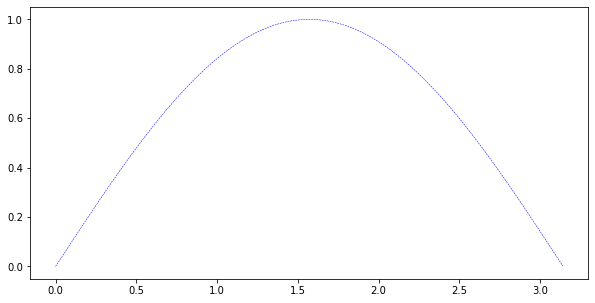

In [75]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=0.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    np.append(y_f_sin, sin(result.x, i))
    
ax0.plot(x_in, y_f_sin, 'b', linewidth=0.5, linestyle='--', )

In [46]:
for i in x_in:
    print(i)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

In [47]:
x_in

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [71]:
t = np.array([])

In [72]:
np.append(t, 9.8)

array([9.8])